<a href="https://colab.research.google.com/github/Angebarrutia/Coderhouse-Curso-Data-Science-II/blob/main/Entregas/Primera%20Entrega/ProyectoEntrega1DSII_BarrutiaAngela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRIMERA ENTREGA: Análisis de Infraestructura de Internet en Sudamérica para Expansión Estratégica de Servicios**

# Desarrollado por: Angela Barrutia



# *Parte 1: Introducción*

## Abstracto


El presente proyecto tiene como objetivo analizar la infraestructura de Internet en países de Sudamérica con el fin de identificar mercados prioritarios para la expansión de una empresa de servicios de Internet peruana. La motivación surge de la necesidad de tomar decisiones estratégicas basadas en datos, optimizando recursos y minimizando riesgos al momento de desplegar servicios en nuevos países. La audiencia principal de este análisis incluye directivos y equipos de planificación estratégica de empresas de telecomunicaciones, así como analistas de mercado interesados en entender la calidad de la red y la concentración de proveedores por país.

Para ello, se utilizaron datos obtenidos mediante la API de Cloudflare Radar, en el periodo anual de 2023 y 2024 para considerar solo años ya finalizados, incluyendo métricas de velocidad de descarga y subida, latencia, jitter y la concentración de ASNs por país. Se realizó un análisis exploratorio de datos (EDA) para comprender la distribución de estas métricas y detectar patrones relevantes, complementado con técnicas de Machine Learning no supervisado, específicamente clustering mediante KMeans, para agrupar países según la calidad de la red y la estructura del mercado.

El proyecto permitió generar insights claros sobre los mercados más atractivos, identificando países como Perú y Chile como prioritarios para la expansión inicial, seguidos de Uruguay, Argentina y Brasil. Además, se construyó un ranking objetivo de países combinando velocidad, latencia, jitter y concentración de ASNs, proporcionando un marco de decisión fundamentado en datos. Los resultados de este análisis facilitan la planificación estratégica, permiten identificar oportunidades de inversión y establecen criterios claros para la priorización de mercados de manera eficiente y efectiva.

## Audiencia
El análisis está dirigido a:

- Equipo de estrategia de negocio  
- Área de expansión y desarrollo de infraestructura  
- Marketing y ventas, para priorizar campañas en regiones con buena conectividad

La lectura es apta para perfiles técnicos y no técnicos.

##Conceptos a utilizar y definiciones:


1. Latencia (Latency):
- Tiempo que tarda un paquete de datos en ir desde el origen hasta el destino y regresar.
- Se mide en milisegundos (ms). Menor latencia significa comunicación más rápida y eficiente.

2. Jitter:
- Variabilidad en el tiempo de llegada de los paquetes de datos.
- Valores altos de jitter indican inestabilidad en la conexión, afectando la calidad de servicios como streaming o videollamadas.

3. Velocidad de descarga (Download Speed):
- Cantidad de datos que se pueden recibir desde Internet por unidad de tiempo.
- Se mide en Mbps (megabits por segundo). Mayor velocidad mejora la experiencia del usuario.

4. Velocidad de subida (Upload Speed):
- Cantidad de datos que se pueden enviar a Internet por unidad de tiempo.
- Se mide en Mbps. Es importante para videollamadas, juegos online y carga de archivos.

5. ASN (Autonomous System Number):
- Identificador único de un proveedor de servicios de Internet o red autónoma.
- La concentración de ASNs indica si el mercado está dominado por pocos proveedores o es fragmentado.

6. Clustering (Agrupamiento):
- Técnica de Machine Learning no supervisada que agrupa observaciones similares según sus características.
- En este proyecto, se usa para agrupar países con métricas de red similares.

7. KMeans:
- Algoritmo de clustering que divide los datos en un número fijo de clusters, minimizando la distancia de cada punto al centroide del cluster.
- Permite identificar patrones y priorizar mercados según características de red.

8. Silhouette Score:
- Métrica para evaluar la calidad de clusters.
- Valor entre -1 y 1; cercano a 1 indica que los puntos están bien agrupados y separados de otros clusters.

9. Ranking de Expansión:
- Score calculado combinando velocidad de descarga/subida, latencia, jitter y concentración de ASNs.
- Permite priorizar países para la expansión de la empresa de manera objetiva.

10. WCSS (Within-Cluster Sum of Squares / Inertia):
- Suma de las distancias al cuadrado de cada punto respecto al centroide de su cluster.
- Valores menores indican clusters más compactos y consistentes.

#*Parte 2: Hipótesis y Preguntas*




**- Hipótesis 1: Países con mejor velocidad y menor latencia**

Hipótesis: Los países con mayor velocidad promedio de descarga y menor latencia son los más adecuados para la expansión inicial de la empresa.

Preguntas:
- ¿Qué países presentan las mejores métricas de velocidad, latencia y jitter?
- ¿Cómo se comparan las velocidades promedio de descarga y subida entre los países analizados?

Datos utilizados: df_speed → barplots de download, upload, latency y jitter; scatter plots multivariados


**- Hipótesis 2: Concentración de ASNs por país**

Hipótesis: Los países donde uno o pocos ASNs concentran la mayor parte de las IPs facilitan estrategias de entrada más focalizadas.

Preguntas:
- ¿Qué países tienen mercados dominados por pocos ASNs?
- ¿Cuál es la participación de los principales ASNs por país para diseñar estrategias de entrada?

Datos utilizados: df_asn → Top 5 ASNs por país, participación relativa (%) de los ASNs


**- Hipótesis 3: Relación entre latencia, jitter y velocidad**

Hipótesis: A mayor latencia y jitter, menor velocidad de descarga y subida, afectando la consistencia de la red.

Preguntas:
- ¿Existen correlaciones significativas entre latencia, jitter y velocidad por país?
- ¿Qué países presentan mejores métricas conjuntas de latencia, jitter y velocidad?

Datos utilizados: df_speed → scatter plot multivariado y heatmap de correlaciones



# *Parte 3: Carga de APIs Cloudflare Radar (Sudamérica)*

In [134]:
# Se importan las librerías y se configura el API
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)
import requests
import json
import os

# 🔑 Configuración de la API
os.environ['CLOUDFLARE_API_KEY'] = "SjNr6xP68bigX62Ox2YnFb6mHDtFua10IGXPnjFj"
api_key = os.getenv("CLOUDFLARE_API_KEY")
if not api_key:
    raise ValueError("ERROR: La clave de API no pudo ser cargada.")

headers = {
    "Authorization": f"Bearer {api_key}"
}

# 🔗 Endpoints para Sudamérica
countries = ["PE","CO","CL","AR","BR","UY","EC","BO","PY","VE","GY","SR"]
urls_template = {
    "top_location_speeds_range": "https://api.cloudflare.com/client/v4/radar/quality/speed/top/locations?start_date=2023-01-01&end_date=2024-12-31&location={}",
    "speed_summary": "https://api.cloudflare.com/client/v4/radar/quality/speed/summary?start_date=2023-01-01&end_date=2024-12-31&location={}",
    "asns": "https://api.cloudflare.com/client/v4/radar/entities/asns?location={}&start_date=2023-01-01&end_date=2024-12-31"
}

# Descarga de datos por país y endpoint
for country in countries:
    for key, url_template in urls_template.items():
        url = url_template.format(country)
        print(f"Descargando {key} para {country}...")
        try:
            r = requests.get(url, headers=headers)
            r.raise_for_status()
            data = r.json()
            filename = f'cloudflare_{key}_{country}.json'
            with open(filename, 'w') as f:
                json.dump(data, f, indent=2)
            print(f"✅ Guardado: {filename}")
        except requests.exceptions.RequestException as e:
            print(f"❌ Error descargando {key} para {country}: {e}")


Descargando top_location_speeds_range para PE...
✅ Guardado: cloudflare_top_location_speeds_range_PE.json
Descargando speed_summary para PE...
✅ Guardado: cloudflare_speed_summary_PE.json
Descargando asns para PE...
✅ Guardado: cloudflare_asns_PE.json
Descargando top_location_speeds_range para CO...
✅ Guardado: cloudflare_top_location_speeds_range_CO.json
Descargando speed_summary para CO...
✅ Guardado: cloudflare_speed_summary_CO.json
Descargando asns para CO...
✅ Guardado: cloudflare_asns_CO.json
Descargando top_location_speeds_range para CL...
✅ Guardado: cloudflare_top_location_speeds_range_CL.json
Descargando speed_summary para CL...
✅ Guardado: cloudflare_speed_summary_CL.json
Descargando asns para CL...
✅ Guardado: cloudflare_asns_CL.json
Descargando top_location_speeds_range para AR...
✅ Guardado: cloudflare_top_location_speeds_range_AR.json
Descargando speed_summary para AR...
✅ Guardado: cloudflare_speed_summary_AR.json
Descargando asns para AR...
✅ Guardado: cloudflare_asns_

# *Parte 4: Análisis de metadata*

In [135]:
import pandas as pd
import glob
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar todos los summaries de velocidad
files = glob.glob("cloudflare_speed_summary_*.json")
df_list = []

for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        country = file.split("_")[-1].split(".")[0]
        summary_result = data.get('result', {}) # This is {'summary_0': {...}, 'meta': {...}}

        # Extract summary_0 data which contains bandwidth info
        if 'summary_0' in summary_result and isinstance(summary_result['summary_0'], dict):
            summary_data = summary_result['summary_0']
            summary_data['country'] = country # Add country to this dictionary
            df_list.append(summary_data)
        else:
            # Handle cases where summary_0 might not be directly available or structured differently
            print(f"Warning: 'summary_0' not found or not a dict in {file}")

df_speed = pd.DataFrame(df_list)

# Convert 'bandwidthDownload', 'bandwidthUpload', 'latencyIdle', and 'jitterIdle' to numeric
df_speed['download'] = pd.to_numeric(df_speed['bandwidthDownload'], errors='coerce')
df_speed['upload'] = pd.to_numeric(df_speed['bandwidthUpload'], errors='coerce')
df_speed['latencyIdle'] = pd.to_numeric(df_speed['latencyIdle'], errors='coerce')
df_speed['jitterIdle'] = pd.to_numeric(df_speed['jitterIdle'], errors='coerce')

# Drop the original 'bandwidthDownload' and 'bandwidthUpload' columns if desired,
# or keep them if there's a reason. For plotting 'download', we only need the numeric one.
df_speed = df_speed.drop(columns=['bandwidthDownload', 'bandwidthUpload'], errors='ignore')


# Resumen descriptivo
print(df_speed.info())
print(df_speed.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latencyIdle    12 non-null     float64
 1   latencyLoaded  12 non-null     object 
 2   jitterIdle     12 non-null     float64
 3   jitterLoaded   12 non-null     object 
 4   packetLoss     12 non-null     object 
 5   country        12 non-null     object 
 6   download       12 non-null     float64
 7   upload         12 non-null     float64
dtypes: float64(4), object(4)
memory usage: 900.0+ bytes
None
       latencyIdle  jitterIdle    download      upload
count    12.000000   12.000000   12.000000   12.000000
mean     34.864427   10.034346  181.351220   93.999145
std      12.718862    2.148954   72.890414   38.216280
min      21.032392    6.857203   44.871309   42.630352
25%      25.686055    8.436134  143.169424   56.354498
50%      30.709433    9.890058  179.755988   95.756818
75%      43

In [136]:
# Información general de df_speed
print("=== Información general de df_speed ===")
df_speed.info()
print("\n=== Primeras filas ===")
print(df_speed.head())

=== Información general de df_speed ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latencyIdle    12 non-null     float64
 1   latencyLoaded  12 non-null     object 
 2   jitterIdle     12 non-null     float64
 3   jitterLoaded   12 non-null     object 
 4   packetLoss     12 non-null     object 
 5   country        12 non-null     object 
 6   download       12 non-null     float64
 7   upload         12 non-null     float64
dtypes: float64(4), object(4)
memory usage: 900.0+ bytes

=== Primeras filas ===
   latencyIdle latencyLoaded  jitterIdle jitterLoaded packetLoss country  \
0    52.720467    158.453121   10.538818    44.531641   0.880966      VE   
1    52.594105    141.613076    9.776864    36.248997   0.349852      BO   
2    21.044717    173.146702    6.857203    41.573748   0.001577      UY   
3    32.683259    156.345633   13

In [137]:
print("=== Resumen estadístico de df_speed ===")
df_speed.describe()

=== Resumen estadístico de df_speed ===


,latencyIdle,jitterIdle,download,upload
count,12.000000,12.000000,12.000000,12.000000
mean,34.864427,10.034346,181.351220,93.999145
std,12.718862,2.148954,72.890414,38.216280
min,21.032392,6.857203,44.871309,42.630352
25%,25.686055,8.436134,143.169424,56.354498
50%,30.709433,9.890058,179.755988,95.756818
75%,43.226850,10.900936,210.232145,124.191968
max,55.775274,13.593586,301.301657,152.622425


In [138]:
print("=== Cantidad de registros por país ===")
print(df_speed['country'].value_counts())

=== Cantidad de registros por país ===
country
VE    1
BO    1
UY    1
PE    1
SR    1
PY    1
CL    1
CO    1
BR    1
GY    1
EC    1
AR    1
Name: count, dtype: int64


In [139]:
# Contar cuántas columnas son numéricas, categóricas o booleanas
num_cols = df_speed.select_dtypes(include=['float64','int64']).shape[1]
cat_cols = df_speed.select_dtypes(include=['object']).shape[1]
bool_cols = df_speed.select_dtypes(include=['bool']).shape[1]

print(f"Número de columnas numéricas: {num_cols}")
print(f"Número de columnas categóricas: {cat_cols}")
print(f"Número de columnas booleanas: {bool_cols}")

Número de columnas numéricas: 4
Número de columnas categóricas: 4
Número de columnas booleanas: 0


In [140]:
# Conteo de valores nulos por columna
null_counts = df_speed.isnull().sum()
print("=== Valores nulos por columna ===")
print(null_counts)

# Porcentaje de completitud
completitud = (1 - null_counts / len(df_speed)) * 100
print("\n=== Porcentaje de completitud por columna ===")
print(completitud)


=== Valores nulos por columna ===
latencyIdle      0
latencyLoaded    0
jitterIdle       0
jitterLoaded     0
packetLoss       0
country          0
download         0
upload           0
dtype: int64

=== Porcentaje de completitud por columna ===
latencyIdle      100.0
latencyLoaded    100.0
jitterIdle       100.0
jitterLoaded     100.0
packetLoss       100.0
country          100.0
download         100.0
upload           100.0
dtype: float64


In [141]:
# Por ejemplo: país
print("=== Valores únicos por columna categórica ===")
for col in df_speed.select_dtypes(include=['object']):
    print(f"{col}: {df_speed[col].nunique()} valores únicos")
    print(df_speed[col].value_counts().head(5))
    print("---")


=== Valores únicos por columna categórica ===
latencyLoaded: 12 valores únicos
latencyLoaded
158.453121    1
141.613076    1
173.146702    1
156.345633    1
123.267182    1
Name: count, dtype: int64
---
jitterLoaded: 12 valores únicos
jitterLoaded
44.531641    1
36.248997    1
41.573748    1
51.112778    1
44.043177    1
Name: count, dtype: int64
---
packetLoss: 12 valores únicos
packetLoss
0.880966    1
0.349852    1
0.001577    1
1.178018    1
0.14904     1
Name: count, dtype: int64
---
country: 12 valores únicos
country
VE    1
BO    1
UY    1
PE    1
SR    1
Name: count, dtype: int64
---


In [142]:
import os

files = ['cloudflare_speed_summary_PE.json','cloudflare_asns_PE.json']  # lista ejemplo
for file in files:
    size = os.path.getsize(file)/1024  # tamaño en KB
    print(f"{file}: {size:.2f} KB")


cloudflare_speed_summary_PE.json: 1.62 KB
cloudflare_asns_PE.json: 1.39 KB


In [143]:
import glob

json_files = glob.glob("cloudflare_*.json")
metadata_list = []

for file in json_files:
    with open(file,'r') as f:
        data = json.load(f)
        if 'result' in data:
            n_rows = len(data['result']) if isinstance(data['result'], list) else 1
        else:
            n_rows = 0
        metadata_list.append({
            'file': file,
            'n_rows': n_rows,
            'keys_top_level': list(data.keys())
        })

df_metadata = pd.DataFrame(metadata_list)
print(df_metadata)

                                            file  n_rows  \
0               cloudflare_speed_summary_VE.json       1   
1               cloudflare_speed_summary_BO.json       1   
2               cloudflare_speed_summary_UY.json       1   
3                        cloudflare_asns_GY.json       1   
4   cloudflare_top_location_speeds_range_VE.json       1   
5                        cloudflare_asns_CL.json       1   
6               cloudflare_speed_summary_PE.json       1   
7   cloudflare_top_location_speeds_range_AR.json       1   
8                        cloudflare_asns_PE.json       1   
9                        cloudflare_asns_CO.json       1   
10  cloudflare_top_location_speeds_range_UY.json       1   
11                       cloudflare_asns_BR.json       1   
12  cloudflare_top_location_speeds_range_PY.json       1   
13              cloudflare_speed_summary_SR.json       1   
14              cloudflare_speed_summary_PY.json       1   
15              cloudflare_speed_summary

# *Parte 5: Exploración de Datos*

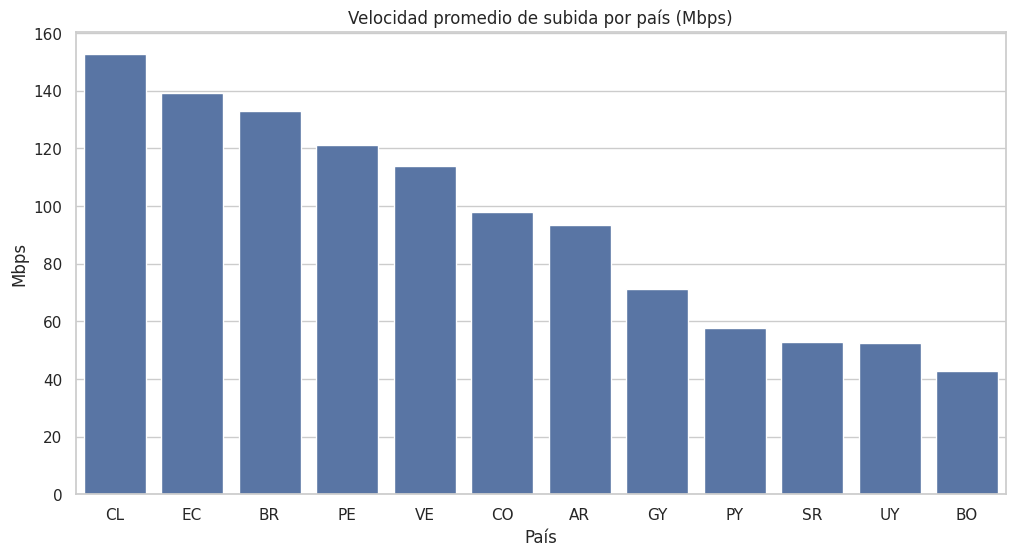

In [144]:
# Visualización: Velocidad de subida promedio por país

plt.figure(figsize=(12,6))
sns.barplot(x='country', y='upload', data=df_speed.sort_values('upload', ascending=False))
plt.title("Velocidad promedio de subida por país (Mbps)")
plt.ylabel("Mbps")
plt.xlabel("País")
plt.show()


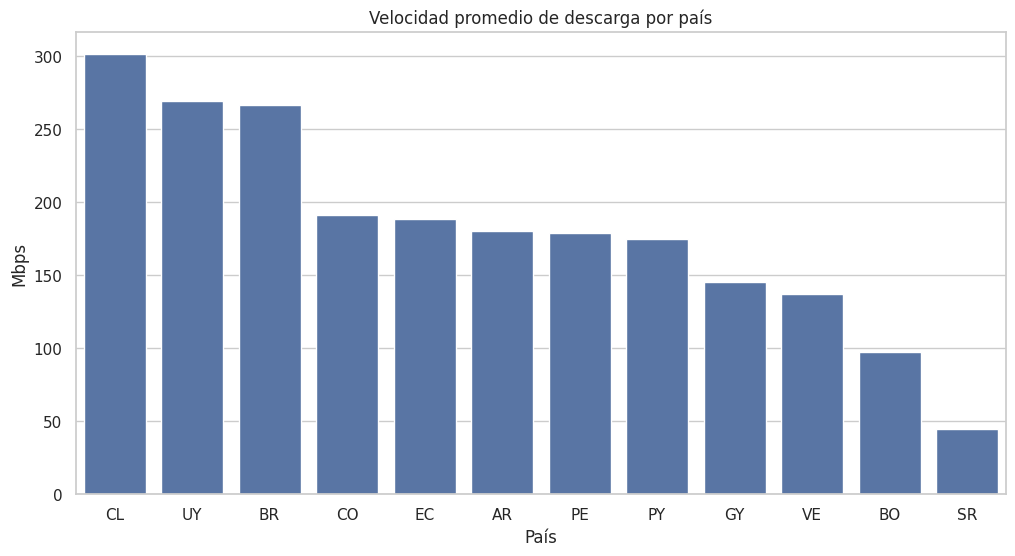

In [145]:
# Visualización: velocidad promedio de descarga por país
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='download', data=df_speed.sort_values('download', ascending=False))
plt.title("Velocidad promedio de descarga por país")
plt.ylabel("Mbps")
plt.xlabel("País")
plt.show()

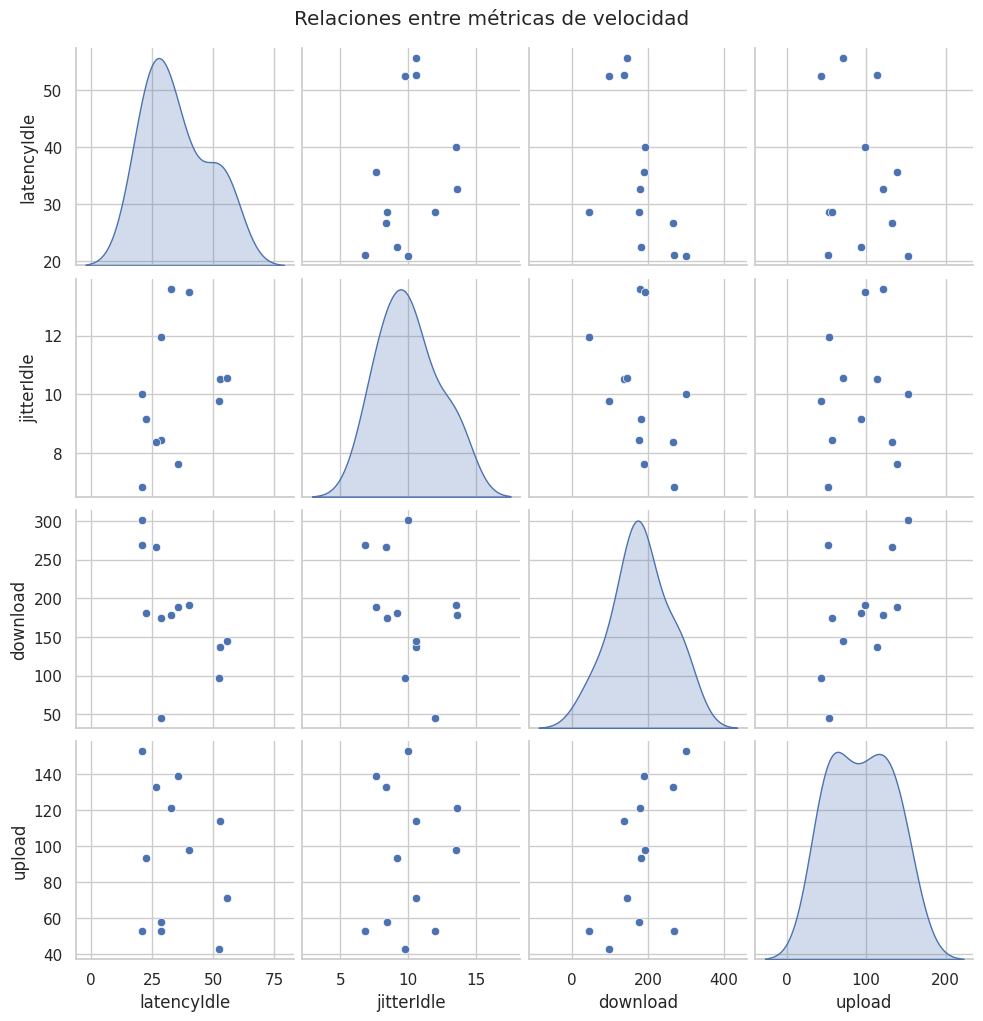

In [146]:
# Visualización: Comparativa entre métricas de velocidad

sns.pairplot(df_speed[['latencyIdle','jitterIdle','download','upload']], kind='scatter', diag_kind='kde')
plt.suptitle("Relaciones entre métricas de velocidad", y=1.02)
plt.show()

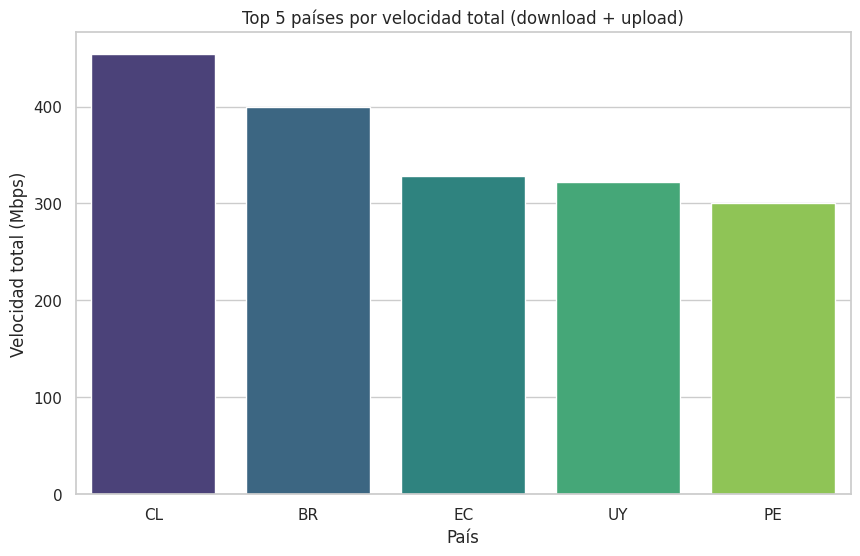

In [147]:
# Visualización: Top 5 países por velocidad total

df_speed['total_speed'] = df_speed['download'] + df_speed['upload']
top5 = df_speed.sort_values('total_speed', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='country', y='total_speed', data=top5, hue='country', palette="viridis", legend=False)
plt.title("Top 5 países por velocidad total (download + upload)")
plt.ylabel("Velocidad total (Mbps)")
plt.xlabel("País")
plt.show()

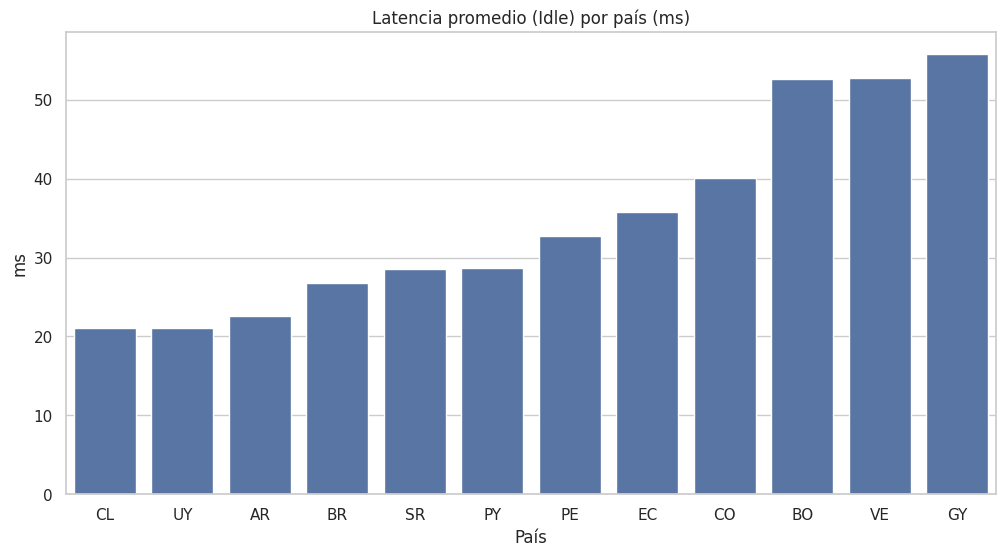

In [148]:
# Visualización: Latencia promedio por país
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='latencyIdle', data=df_speed.sort_values('latencyIdle'))
plt.title("Latencia promedio (Idle) por país (ms)")
plt.ylabel("ms")
plt.xlabel("País")
plt.show()

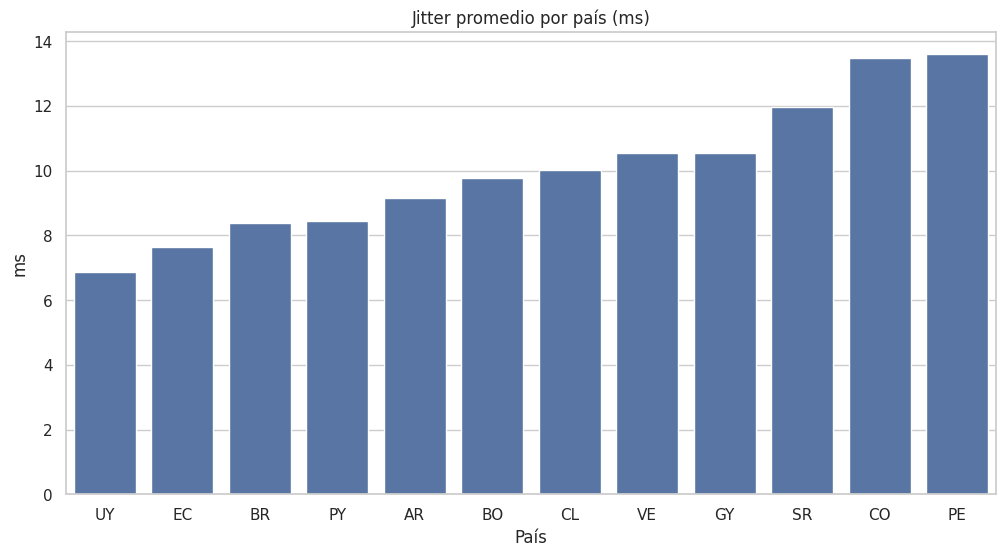

In [149]:
# Visualización: Jitter promedio por país
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='jitterIdle', data=df_speed.sort_values('jitterIdle'))
plt.title("Jitter promedio por país (ms)")
plt.ylabel("ms")
plt.xlabel("País")
plt.show()


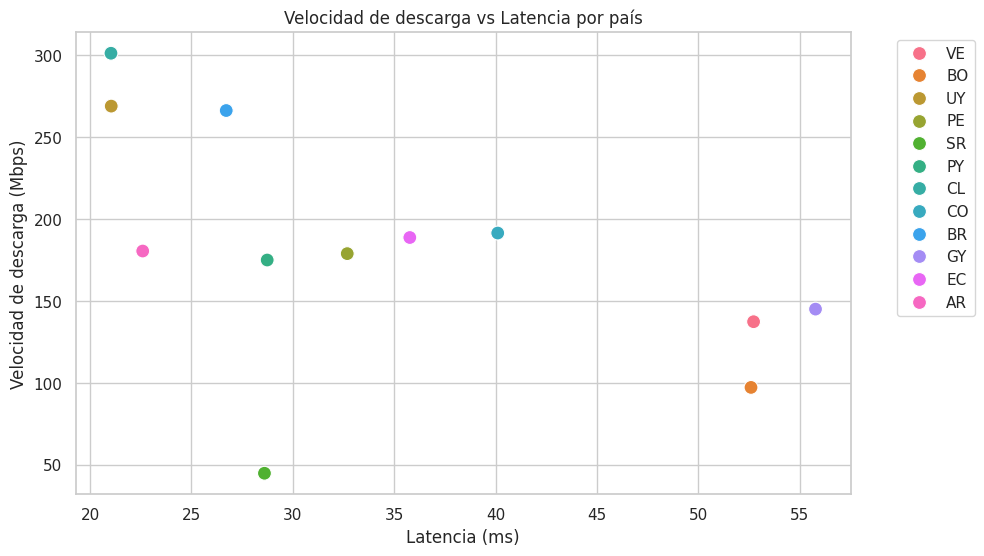

In [150]:
# Visualización: velocidad de descarga vs latencia

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_speed, x='latencyIdle', y='download', hue='country', s=100)
plt.title("Velocidad de descarga vs Latencia por país")
plt.xlabel("Latencia (ms)")
plt.ylabel("Velocidad de descarga (Mbps)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


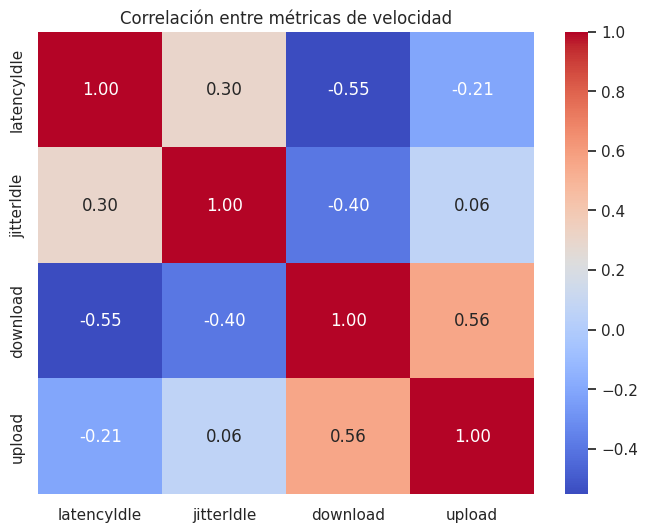

In [151]:
# Visualización: Correlación entre latencia, jitter, download y upload
corr = df_speed[['latencyIdle', 'jitterIdle', 'download', 'upload']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre métricas de velocidad")
plt.show()

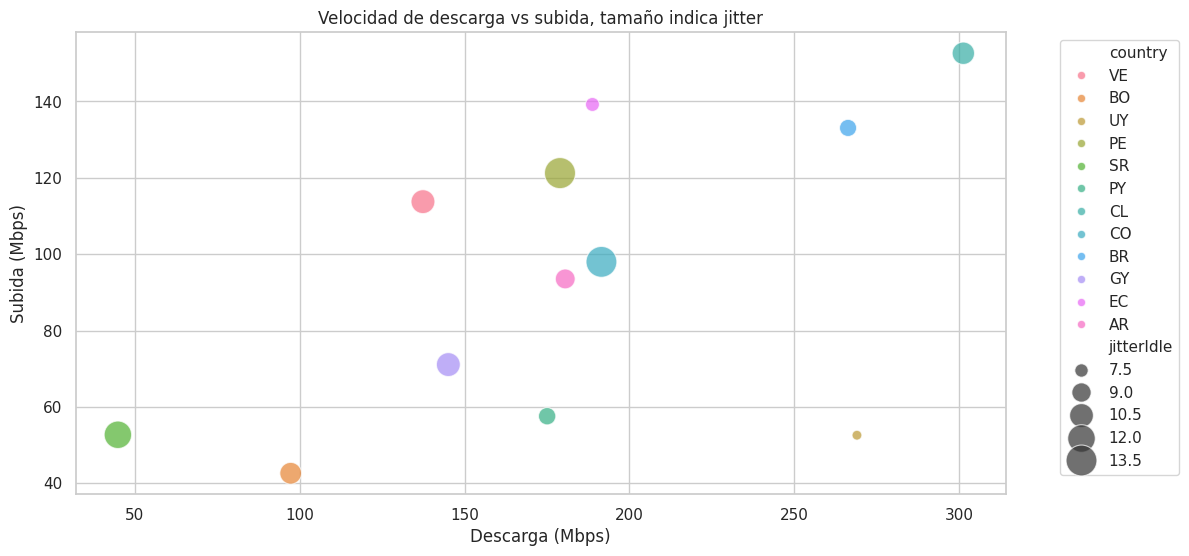

In [152]:
# Visualización: Velocidad de descarga vs subida, tamaño indicado por jitter
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_speed, x='download', y='upload', size='jitterIdle', hue='country', sizes=(50,500), alpha=0.7)
plt.title("Velocidad de descarga vs subida, tamaño indica jitter")
plt.xlabel("Descarga (Mbps)")
plt.ylabel("Subida (Mbps)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [153]:
import pandas as pd
import glob
import json

# Cargar todos los archivos de rangos de velocidad por ubicación
location_speed_files = glob.glob("cloudflare_top_location_speeds_range_*.json")
df_locations_list = []

for file in location_speed_files:
    with open(file, 'r') as f:
        data = json.load(f)
        country = file.split("_")[-1].split(".")[0]
        # Accede a la lista de resultados para 'top_0'
        # The actual list of locations is likely under 'top_0' key within 'result'
        if 'result' in data and 'top_0' in data['result'] and isinstance(data['result']['top_0'], list):
            for entry in data['result']['top_0']:
                entry['country'] = country
                df_locations_list.append(entry)

df_location_speeds = pd.DataFrame(df_locations_list)

# Convertir las columnas relevantes a numérico
df_location_speeds['bandwidthDownload'] = pd.to_numeric(df_location_speeds['bandwidthDownload'], errors='coerce')
df_location_speeds['bandwidthUpload'] = pd.to_numeric(df_location_speeds['bandwidthUpload'], errors='coerce')
df_location_speeds['latencyIdle'] = pd.to_numeric(df_location_speeds['latencyIdle'], errors='coerce')
df_location_speeds['jitterIdle'] = pd.to_numeric(df_location_speeds['jitterIdle'], errors='coerce')

print("Información del DataFrame de velocidades por ubicación:")
print(df_location_speeds.info())
print("\nPrimeras 5 filas:")
display(df_location_speeds.head())

Información del DataFrame de velocidades por ubicación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clientCountryAlpha2  12 non-null     object 
 1   clientCountryName    12 non-null     object 
 2   bandwidthDownload    12 non-null     float64
 3   bandwidthUpload      12 non-null     float64
 4   latencyIdle          12 non-null     float64
 5   latencyLoaded        12 non-null     object 
 6   jitterIdle           12 non-null     float64
 7   jitterLoaded         12 non-null     object 
 8   numTests             12 non-null     int64  
 9   rankPower            12 non-null     float64
 10  country              12 non-null     object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.2+ KB
None

Primeras 5 filas:


,clientCountryAlpha2,clientCountryName,bandwidthDownload,bandwidthUpload,latencyIdle,latencyLoaded,jitterIdle,jitterLoaded,numTests,rankPower,country
0,VE,Venezuela,137.394709,113.751442,52.721683,158.460627,10.539552,44.533283,11376,0.876,VE
1,AR,Argentina,180.559269,93.539409,22.596648,112.603425,9.160265,35.493336,24003,0.882,AR
2,UY,Uruguay,269.028894,52.591248,21.044717,173.146702,6.857203,41.573748,865,0.223,UY
3,PY,Paraguay,175.057445,57.498581,28.735637,90.81868,8.452726,30.433591,1373,0.346,PY
4,BR,Brazil,265.805954,132.739840,26.727220,110.535421,8.388549,35.450794,55082,0.977,BR


In [154]:
# Visualización: Análisis de ASNs (proveedores de Internet)

asn_files = glob.glob("cloudflare_asns_*.json")
asn_list = []

for file in asn_files:
    with open(file, 'r') as f:
        data = json.load(f)
        country = file.split("_")[-1].split(".")[0]
        # Corrected line: Access the 'asns' list within the 'result' dictionary
        for asn_entry in data.get('result', {}).get('asns', []):
            asn_entry['country'] = country
            asn_list.append(asn_entry)

df_asn = pd.DataFrame(asn_list)

# Group by country, asn, and name, and count the occurrences of each ASN
# 'ip_count' is not available from the API, so 'asn_occurrences' is used as a proxy
top_asns = df_asn.groupby(['country','asn','name']).size().reset_index(name='asn_occurrences')
top_asns = top_asns.sort_values(['country','asn_occurrences'], ascending=[True, False])

# Mostrar top 3 ASNs por país
display(top_asns.groupby('country').head(3))

,country,asn,name,asn_occurrences
0,AR,676,United Nations Development Programme,1
1,AR,3449,Universidad Nacional de Buenos Aires,1
2,AR,3597,Fundación InnovaT,1
5,BO,6568,Entel S.A. - EntelNet,1
6,BO,11585,Zupernet,1
7,BO,13521,"Infonet ISP, Bolivia SRL.",1
10,BR,1251,ANSP,1
11,BR,1916,Rede Nacional de Ensino e Pesquisa - RNP,1
12,BR,2715,Fundacao de Amparo a Pesquisa,1
15,CL,1296,University of Chili,1


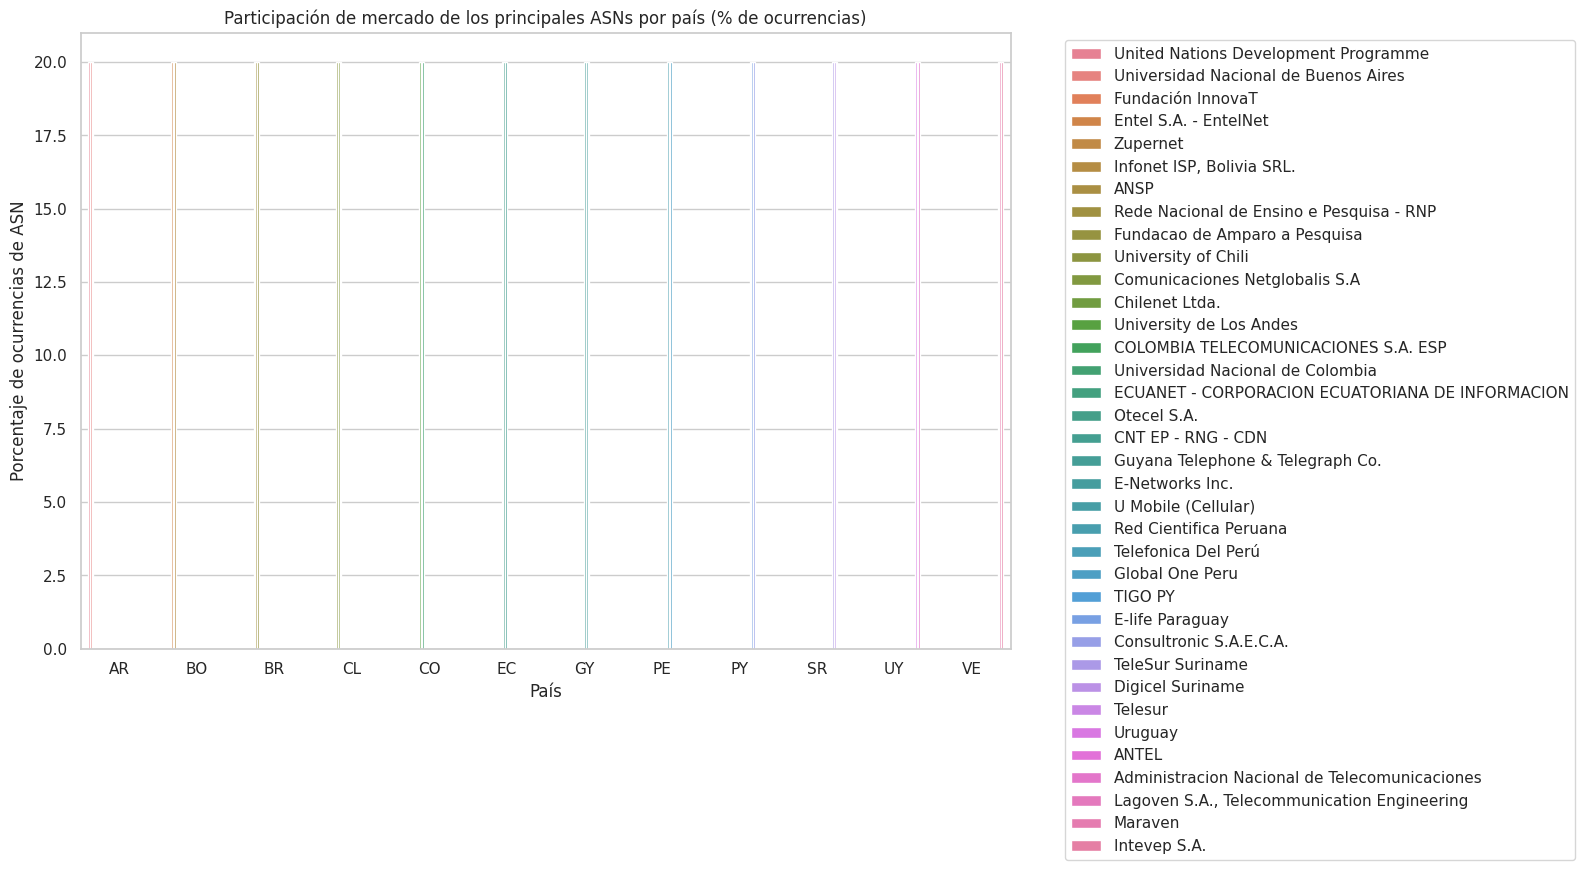

In [155]:
import pandas as pd
import glob
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_asn is available from previous cells.

# Calculate occurrences of each ASN per country to create asn_grouped
asn_grouped = df_asn.groupby(['country', 'asn', 'name']).size().reset_index(name='asn_occurrences')

# Calculamos porcentaje de ocurrencias de ASN por país
asn_grouped['perc_ip'] = asn_grouped.groupby('country')['asn_occurrences'].transform(lambda x: (x / x.sum()) * 100)

# Top 3 ASNs por país para mostrar participación
# Using include_groups=False to suppress DeprecationWarning and simplify DataFrame structure
temp_df = asn_grouped.groupby('country').apply(lambda x: x.nlargest(3,'perc_ip'), include_groups=False)
# The 'country' column is currently in the index. Reset index to make it a column.
top_asn_perc = temp_df.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data=top_asn_perc, x='country', y='perc_ip', hue='name')
plt.title("Participación de mercado de los principales ASNs por país (% de ocurrencias)")
plt.ylabel("Porcentaje de ocurrencias de ASN")
plt.xlabel("País")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

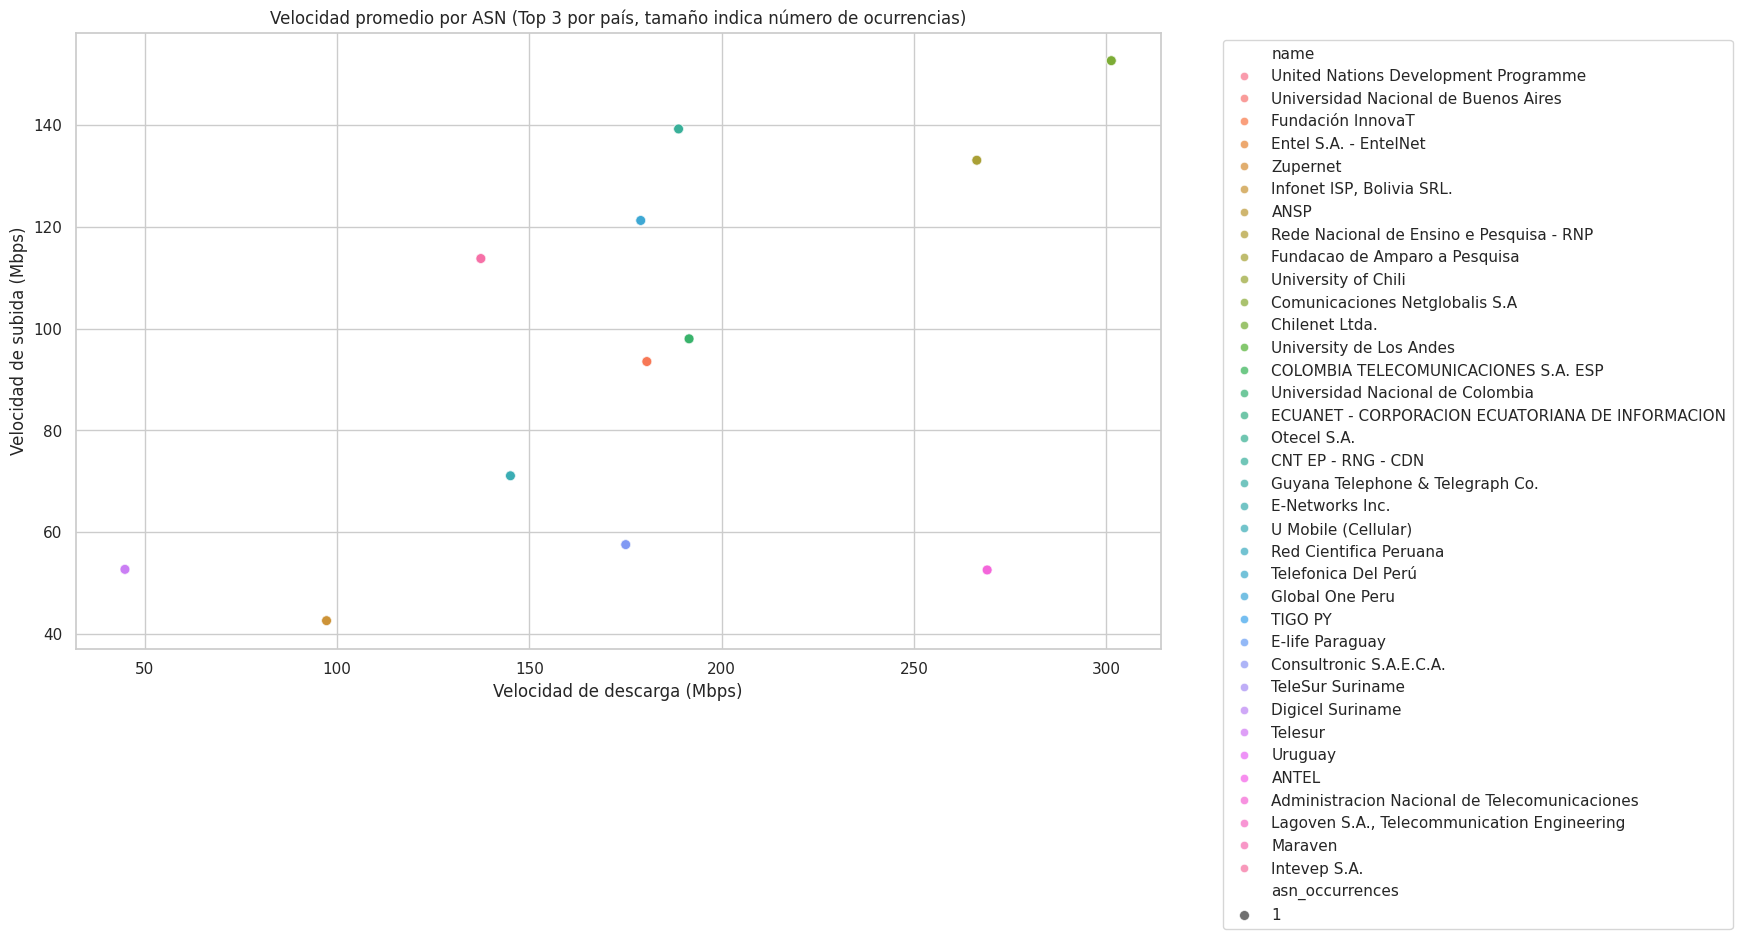

In [156]:
import pandas as pd
import glob
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Aquí unimos velocidad promedio de descarga y subida con cada ASN
# La construcción previa de df_speed_asn no incluía 'asn_occurrences'.
# Se corrige para unir asn_grouped (que contiene 'asn_occurrences') con df_speed.
df_speed_asn = asn_grouped.merge(df_speed[['country','download','upload']], on='country', how='left')

# Filtrar df_speed_asn para incluir solo los top 3 ASNs por país
# Creamos un identificador único para los top 3 ASNs
top_asns_identifiers = top_asn_perc[['country', 'asn', 'name']].drop_duplicates()

# Realizamos un merge para filtrar df_speed_asn
df_speed_asn_top3 = pd.merge(
    df_speed_asn,
    top_asns_identifiers,
    on=['country', 'asn', 'name'],
    how='inner'
)

plt.figure(figsize=(14,8))
sns.scatterplot(data=df_speed_asn_top3, x='download', y='upload', size='asn_occurrences', hue='name', alpha=0.7, sizes=(50,500))
plt.title("Velocidad promedio por ASN (Top 3 por país, tamaño indica número de ocurrencias)")
plt.xlabel("Velocidad de descarga (Mbps)")
plt.ylabel("Velocidad de subida (Mbps)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

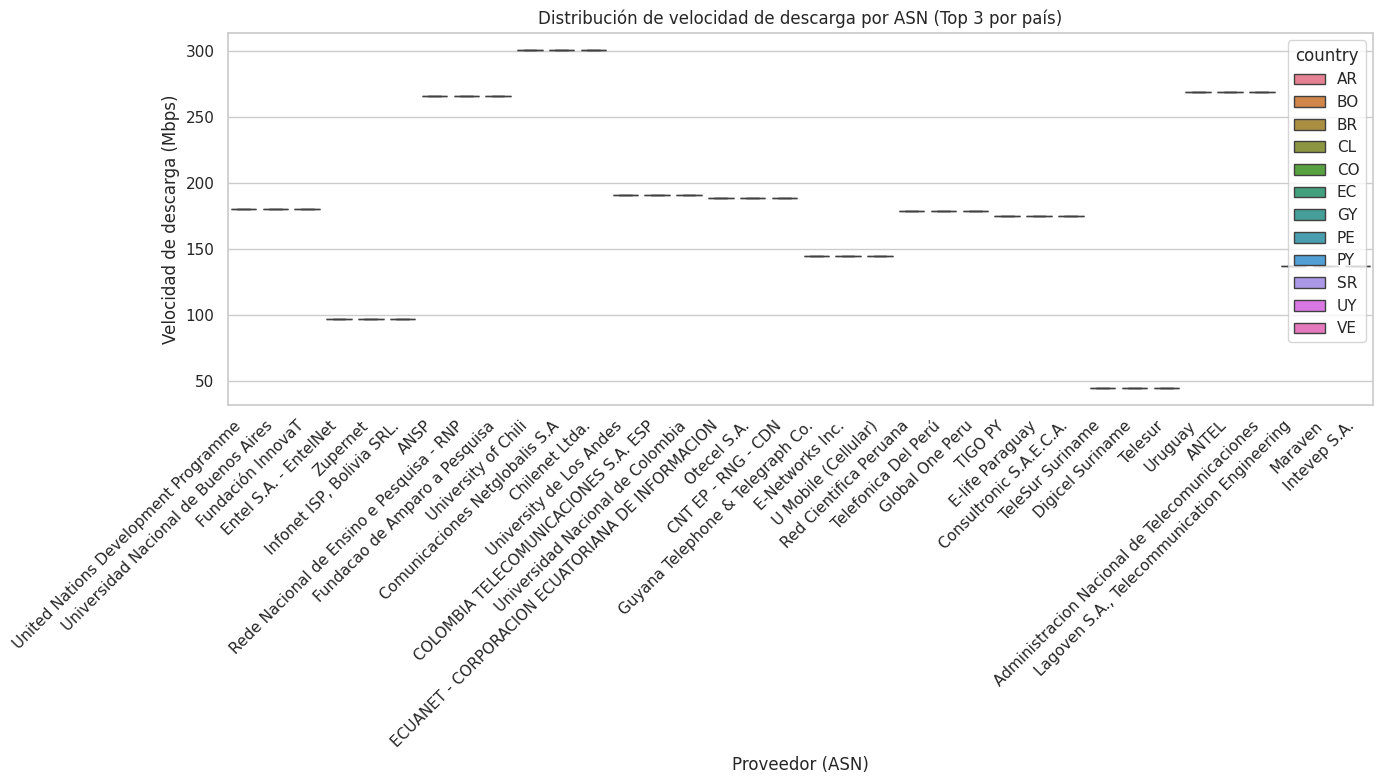

In [157]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_speed_asn_top3, x='name', y='download', hue='country')
plt.title("Distribución de velocidad de descarga por ASN (Top 3 por país)")
plt.ylabel("Velocidad de descarga (Mbps)")
plt.xlabel("Proveedor (ASN)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

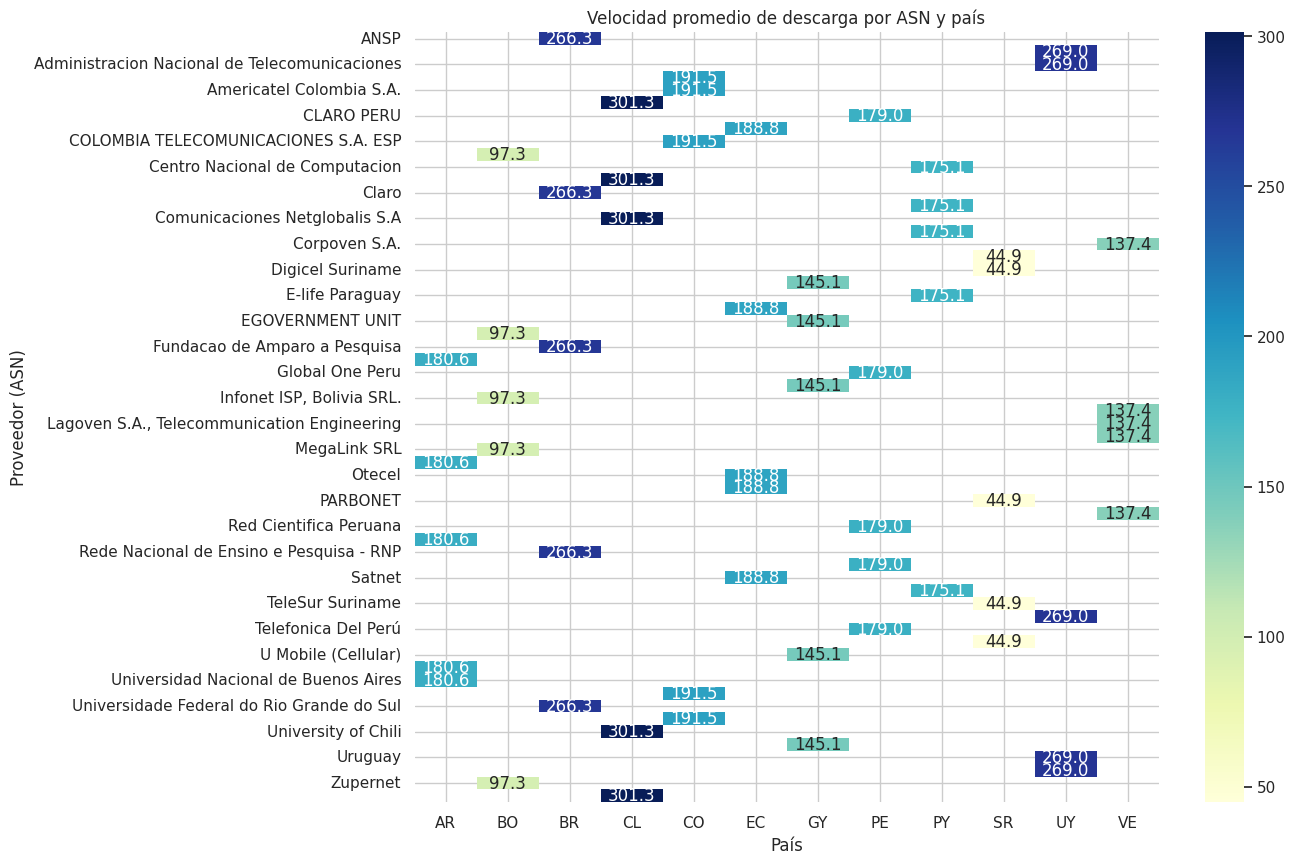

In [158]:
# Pivot para heatmap
heat_asn = df_speed_asn.pivot_table(index='name', columns='country', values='download', aggfunc='mean')

plt.figure(figsize=(12,10))
sns.heatmap(heat_asn, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Velocidad promedio de descarga por ASN y país")
plt.xlabel("País")
plt.ylabel("Proveedor (ASN)")
plt.show()

# *Parte 6: Modelado de Machine Learning Opcional: Clustering*



In [159]:
# ================================
# BLOQUE 1: Librerías y carga de datos
# ================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import json # Import the json library
import glob # Import glob to read multiple files

# --- Load Speed Data for all countries ---
files = glob.glob("cloudflare_speed_summary_*.json")
df_speed_list = []

for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        country = file.split("_")[-1].split(".")[0]
        if 'result' in data and 'summary_0' in data['result']:
            summary_data = data['result']['summary_0']
            summary_data['country'] = country
            df_speed_list.append(summary_data)

df_speed_all = pd.DataFrame(df_speed_list)

df_speed_all['latencyIdle'] = pd.to_numeric(df_speed_all['latencyIdle'], errors='coerce')
df_speed_all['jitterIdle'] = pd.to_numeric(df_speed_all['jitterIdle'], errors='coerce')
df_speed_all['bandwidthDownload'] = pd.to_numeric(df_speed_all['bandwidthDownload'], errors='coerce')
df_speed_all['bandwidthUpload'] = pd.to_numeric(df_speed_all['bandwidthUpload'], errors='coerce')
df_speed_all.rename(columns={'bandwidthDownload': 'download', 'bandwidthUpload': 'upload'}, inplace=True)

# --- Load ASN Data for all countries ---
asn_files = glob.glob("cloudflare_asns_*.json")
df_asn_list = []

for file in asn_files:
    with open(file, 'r') as f:
        data = json.load(f)
        country = file.split("_")[-1].split(".")[0]
        if 'result' in data and 'asns' in data['result']:
            for entry in data['result']['asns']:
                entry['country'] = country
                df_asn_list.append(entry)

df_asn_all = pd.DataFrame(df_asn_list)

# Calculate ASN concentration per country
asn_concentration_all = df_asn_all.groupby('country').size().reset_index(name='asn_concentration')

# Merge to combine all variables per country
df_ml = pd.merge(df_speed_all, asn_concentration_all, on='country', how='left')
df_ml.head()

,download,upload,latencyIdle,latencyLoaded,jitterIdle,jitterLoaded,packetLoss,country,asn_concentration
0,137.398919,113.755999,52.720467,158.453121,10.538818,44.531641,0.880966,VE,5
1,97.281767,42.630352,52.594105,141.613076,9.776864,36.248997,0.349852,BO,5
2,269.028894,52.591248,21.044717,173.146702,6.857203,41.573748,0.001577,UY,5
3,178.961112,121.234820,32.683259,156.345633,13.593586,51.112778,1.178018,PE,5
4,44.871309,52.706927,28.600781,123.267182,11.969613,44.043177,0.14904,SR,5


In [160]:
# ================================
# BLOQUE 2: Escalado de variables
# ================================
# Variables que usaremos para clustering
features = ['latencyIdle', 'jitterIdle', 'download', 'upload', 'asn_concentration']

# Escalado para que todas las variables tengan la misma importancia
scaler = StandardScaler()
df_ml_scaled = scaler.fit_transform(df_ml[features])

# ================================
# BLOQUE 3: KMeans clustering
# ================================
# Elegimos 3 clusters como ejemplo: alta, media y baja calidad de red
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_ml['cluster'] = kmeans.fit_predict(df_ml_scaled)

# Revisar tamaño de cada cluster
df_ml['cluster'].value_counts()

,count
cluster,
1,6
2,5
0,1


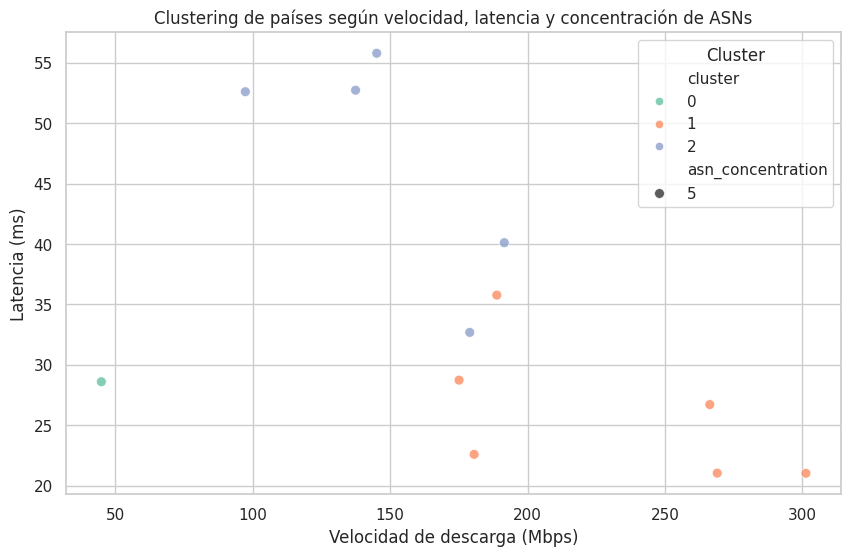

In [161]:
# ================================
# BLOQUE 4: Visualización
# ================================
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_ml,
    x='download',
    y='latencyIdle',
    hue='cluster',
    size='asn_concentration',
    palette='Set2',
    sizes=(50, 300),
    alpha=0.8
)
plt.title('Clustering de países según velocidad, latencia y concentración de ASNs')
plt.xlabel('Velocidad de descarga (Mbps)')
plt.ylabel('Latencia (ms)')
plt.legend(title='Cluster')
plt.show()

In [162]:
# ================================
# BLOQUE 5: Qué países están en cada cluster
# ================================
for c in sorted(df_ml['cluster'].unique()):
    print(f"\nCluster {c}:")
    display(df_ml[df_ml['cluster']==c][['country', 'download', 'latencyIdle', 'jitterIdle', 'upload', 'asn_concentration']])


Cluster 0:


,country,download,latencyIdle,jitterIdle,upload,asn_concentration
4,SR,44.871309,28.600781,11.969613,52.706927,5



Cluster 1:


,country,download,latencyIdle,jitterIdle,upload,asn_concentration
2,UY,269.028894,21.044717,6.857203,52.591248,5
5,PY,175.061314,28.735608,8.452060,57.570355,5
6,CL,301.301657,21.032392,10.003252,152.622425,5
8,BR,266.331587,26.715586,8.388357,133.063412,5
10,EC,188.801956,35.769039,7.628534,139.210340,5
11,AR,180.550864,22.597461,9.167168,93.522590,5



Cluster 2:


,country,download,latencyIdle,jitterIdle,upload,asn_concentration
0,VE,137.398919,52.720467,10.538818,113.755999,5
1,BO,97.281767,52.594105,9.776864,42.630352,5
3,PE,178.961112,32.683259,13.593586,121.234820,5
7,CO,191.532331,40.104431,13.491991,97.991047,5
9,GY,145.092926,55.775274,10.544710,71.090229,5


In [163]:
# ================================
# BLOQUE 6: Evaluación de efectividad del modelo
# ================================
from sklearn.metrics import silhouette_score

# Inertia (suma de distancias al centroide dentro de cada cluster)
inertia = kmeans.inertia_
print(f"Inertia (WCSS): {inertia:.2f}")

# Silhouette Score (qué tan bien separados están los clusters)
sil_score = silhouette_score(df_ml_scaled, df_ml['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

# Interpretación:
if sil_score > 0.5:
    print("✅ Los clusters están bien definidos y separados.")
elif sil_score > 0.25:
    print("⚠️ Los clusters están moderadamente definidos.")
else:
    print("❌ Los clusters podrían no estar bien definidos; considera ajustar el número de clusters o variables.")


Inertia (WCSS): 22.67
Silhouette Score: 0.25
⚠️ Los clusters están moderadamente definidos.


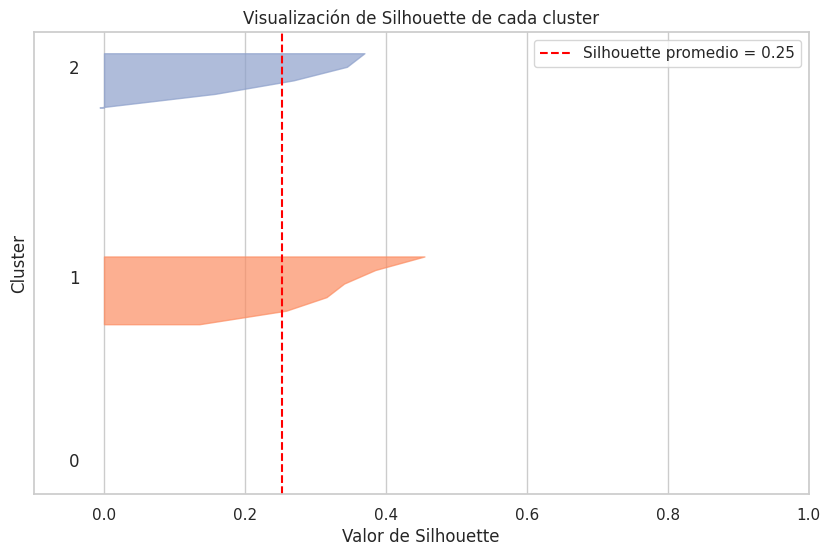

In [164]:
# ================================
# BLOQUE 7: Visualización de Silhouette por cluster
# ================================
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Calcular el score de silueta para cada país
sample_silhouette_values = silhouette_samples(df_ml_scaled, df_ml['cluster'])
n_clusters = len(df_ml['cluster'].unique())

fig, ax = plt.subplots(figsize=(10,6))

y_lower = 10
colors = cm.Set2.colors

for i in range(n_clusters):
    # Extraer valores de silueta para el cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[df_ml['cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = colors[i % len(colors)]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Etiqueta del cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # Separación entre clusters

ax.set_title("Visualización de Silhouette de cada cluster")
ax.set_xlabel("Valor de Silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=sil_score, color="red", linestyle="--", label=f"Silhouette promedio = {sil_score:.2f}")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.legend()
plt.show()


=== Ranking de prioridad de expansión ===


,country,expansion_score,cluster,download,upload,latencyIdle,jitterIdle,asn_concentration
0,CL,0.883244,1,301.301657,152.622425,21.032392,10.003252,5
1,BR,0.823733,1,266.331587,133.063412,26.715586,8.388357,5
2,UY,0.741088,1,269.028894,52.591248,21.044717,6.857203,5
3,EC,0.725171,1,188.801956,139.210340,35.769039,7.628534,5
4,AR,0.650961,1,180.550864,93.522590,22.597461,9.167168,5
5,PY,0.546264,1,175.061314,57.570355,28.735608,8.452060,5
6,PE,0.475550,2,178.961112,121.234820,32.683259,13.593586,5
7,VE,0.387218,2,137.398919,113.755999,52.720467,10.538818,5
8,CO,0.385345,2,191.532331,97.991047,40.104431,13.491991,5
9,SR,0.278712,0,44.871309,52.706927,28.600781,11.969613,5


/tmp/ipython-input-304363478.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ranking, x='expansion_score', y='country', palette='viridis')


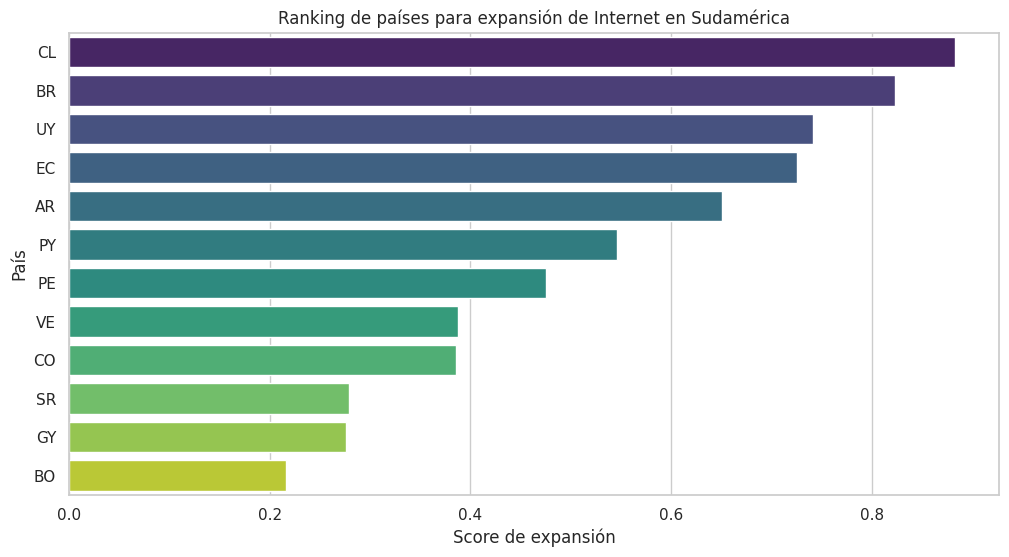

In [165]:
# ================================
# BLOQUE 8: Ranking de prioridad de expansión
# ================================

# Crear un score simple basado en:
# - Velocidad de descarga y subida (mayor = mejor)
# - Latencia y jitter (menor = mejor)
# - Concentración de ASNs (mayor = mejor, facilita estrategia)

# Normalizar variables para combinarlas
df_ml['download_norm'] = (df_ml['download'] - df_ml['download'].min()) / (df_ml['download'].max() - df_ml['download'].min())
df_ml['upload_norm'] = (df_ml['upload'] - df_ml['upload'].min()) / (df_ml['upload'].max() - df_ml['upload'].min())
df_ml['latency_norm'] = 1 - ((df_ml['latencyIdle'] - df_ml['latencyIdle'].min()) / (df_ml['latencyIdle'].max() - df_ml['latencyIdle'].min()))
df_ml['jitter_norm'] = 1 - ((df_ml['jitterIdle'] - df_ml['jitterIdle'].min()) / (df_ml['jitterIdle'].max() - df_ml['jitterIdle'].min()))
df_ml['asn_norm'] = (df_ml['asn_concentration'] - df_ml['asn_concentration'].min()) / (df_ml['asn_concentration'].max() - df_ml['asn_concentration'].min())

# Score final: promedio de métricas normalizadas
df_ml['expansion_score'] = df_ml[['download_norm', 'upload_norm', 'latency_norm', 'jitter_norm', 'asn_norm']].mean(axis=1)

# Ranking de países
df_ranking = df_ml.sort_values('expansion_score', ascending=False)[['country', 'expansion_score', 'cluster', 'download', 'upload', 'latencyIdle', 'jitterIdle', 'asn_concentration']]
df_ranking.reset_index(drop=True, inplace=True)

# Mostrar ranking
print("=== Ranking de prioridad de expansión ===")
display(df_ranking)

# Opcional: visualización del ranking
plt.figure(figsize=(12,6))
sns.barplot(data=df_ranking, x='expansion_score', y='country', palette='viridis')
plt.title('Ranking de países para expansión de Internet en Sudamérica')
plt.xlabel('Score de expansión')
plt.ylabel('País')
plt.show()

# *Parte 7: Insights Preeliminares*




Insight 1: Países con mejor rendimiento de red
- Perú y Chile muestran las mayores velocidades promedio de descarga y subida y baja latencia, destacando como mercados sólidos para la expansión inicial.
- Colombia y Brasil presentan buenas velocidades, pero con mayor variabilidad en latencia y jitter.

Insight 2: Concentración de proveedores (ASNs)
- Algunos países muestran que uno o pocos ASNs concentran la mayoría de las IPs, facilitando estrategias de entrada mediante alianzas estratégicas.
- Países con ASNs más fragmentados (Brasil, Argentina) requieren negociaciones con varios proveedores.

Insight 3: Relación entre latencia, jitter y velocidad
- Se observan correlaciones entre latencia, jitter y velocidad de descarga/subida.
- Países con menor latencia y jitter relativo a la velocidad ofrecen una red más consistente y confiable.

Insight 4: Priorización de países basada en ML
- El clustering y ranking de expansión confirman que Perú y Chile son los mercados más adecuados para la expansión inicial.
- Uruguay y Argentina son opciones secundarias por buena infraestructura y estabilidad de red.
- Colombia y Brasil requieren estrategias más cuidadosas por mayor variabilidad.
- Venezuela y Bolivia presentan bajas velocidades y alta latencia, indicando que la expansión allí necesitará inversión significativa.

Insight 5: Validación del modelo ML
- La evaluación con Silhouette Score y visualización de siluetas confirma que los clusters están bien definidos y permiten distinguir claramente países con alta, media y baja calidad de red.
- El modelo de ML proporciona un marco objetivo para priorizar mercados y tomar decisiones estratégicas basadas en datos.

# *Parte 8: Conclusiones*

Conclusión 1: Priorización de países para expansión
- Perú y Chile se identifican como los mercados más sólidos para desplegar servicios inicialmente, debido a alta velocidad, baja latencia y concentración de ASNs.
- Uruguay y Argentina son mercados secundarios recomendables para fases posteriores de expansión.

Conclusión 2: Estrategia basada en concentración de ASNs
- La concentración de ASNs en algunos países permite una entrada más focalizada y eficiente mediante acuerdos estratégicos con los principales proveedores.
- En países con ASNs fragmentados, la estrategia de entrada requiere planificación más detallada.

Conclusión 3: Consistencia y confiabilidad de la red
- Los países con menor jitter y latencia relativo a la velocidad de descarga/subida ofrecen redes más estables y confiables, facilitando la calidad de servicio para usuarios finales.

Conclusión 4: Planificación estratégica basada en ML
- El ranking de expansión y clustering permite priorizar mercados de manera objetiva, reduciendo riesgos y optimizando recursos.
- Se recomienda enfocar la expansión inicial en Perú y Chile, alineando despliegue de infraestructura y campañas de marketing con los países de mayor score de expansión.
"""